<img src="http://pluspng.com/img-png/metallica-png-metallica-png-file-1571.png" style="float: centre; margin: 15px; height: 200px">

## Objectives

EDA of 'MetallicaData.csv' using various python libraries

## Data Source

https://www.kaggle.com/conklindata/metallica-song-catalog/version/1
    
"A catalog of all Metallica songs from 1983 to 2016. Info included includes length, writing credits, album, year and amount of times James Hetfield says "Yeah" in a given song!"

- Columns

- IDSongID
- AlbumIDAlbum ID
- AlbumAlbum Name
- SongSong Title
- DiscDisc Number
- TrackNumberTrack Number
- YearOriginal release year
- YeahsNumber of times "Yeah" is sang
- MinutesLength minutes
- SecondsLength seconds (remainder)
- LengthInSecondsTotal length in seconds
- YeahsPerSecondYeahs per second
- IsGoldCertified Gold (RIAA)
- IsPlatinumCertified Platinum (RIAA)
- JamesHetfieldWriting Credits
- LarsUlrichWriting Credits
- KirkHammettWriting Credits
- CliffBurtonWriting Credits
- DaveMustaineWriting Credits
- JasonNewsteadWriting Credits
- RobertTrujilloWriting Credits
- LouReedWriting Credits
- PlayedLiveNumber of times played live (Metallica.com)
- LyricsLyrics (azlyrics.com)

## Key questions to consider

#### Live Analysis

What songs are most likely to be played live? What does the distribution of live plays look like?
Are certain albums more likely to be heard live than others? Which ones?

#### Credit Analysis

Who has the most song writing credits and does this change by album?

#### Sales & Awards
    
What albums have gone gold / platinum?


#### Spotify Metrics

What songs / albums get the most plays on Spotify?

#### Predictive Analysis?
 
What are the things that are most likely to predict album sales?
Are we able to predict what Metallica will play live in future given some variables i.e where they

In [62]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

pd.options.mode.chained_assignment = None

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [63]:
data = pd.read_csv("MetallicaData.csv")

In [64]:
## Some of these columns aren't particulalry relevant do I'll drop some of them
data.drop(['ID','Disc','LouReed'], axis=1, inplace=True)

In [65]:
#first let's look at the albums we have included in this dataframe
data.Album.value_counts()

Garage Inc.                    27
Load                           14
Reload                         13
Hardwired� to Self-Destruct    12
Metallica                      12
St. Anger                      11
Lulu                           10
Death Magnetic                 10
Kill 'Em All                   10
�And Justice For All            9
Master of Puppets               8
Ride The Lightning              8
Beyond Magnetic                 4
Other                           3
Name: Album, dtype: int64

## Metallica have released many albums in their career but for the sake of this analysis I'm going to focus on official studio albums of original content and leave aside any cover albums and collaborations

This means exlcuding, 'Lulu','Garage Inc.'Beyond Magnetic' and 'Other' from the data set. It also means se can get rid of Lou Reed as a credit 

In [66]:
met = data[(data.Album != 'Lulu') & (data.Album != 'Garage Inc. ') &(data.Album != 'Beyond Magnetic')&(data.Album != 'Other')]




In [67]:
#checking to see that we're dealing with 'official studio albums'
met.Album.value_counts()

Load                           14
Reload                         13
Hardwired� to Self-Destruct    12
Metallica                      12
St. Anger                      11
Kill 'Em All                   10
Death Magnetic                 10
�And Justice For All            9
Master of Puppets               8
Ride The Lightning              8
Name: Album, dtype: int64

# Live Analysis


<img src="https://orig00.deviantart.net/77fd/f/2012/057/b/0/metallica_polaroid_collage_by_13deadman-d4r0jic.png" style="float: centre; margin: 15px; height: 250px">

## There are a handful of songs that Metallica play A LOT!

In [68]:
#creating a mask to only consider songs that have been played live at least once
more_than = met.PlayedLive > 1
live_plays = met.PlayedLive[more_than]

In [69]:
#Descritptive statistics on live plays
pd.DataFrame(live_plays.describe())

,PlayedLive
count,86.000000
mean,302.488372
std,423.141744
min,2.000000
25%,32.000000
50%,125.000000
75%,301.250000
max,1577.000000


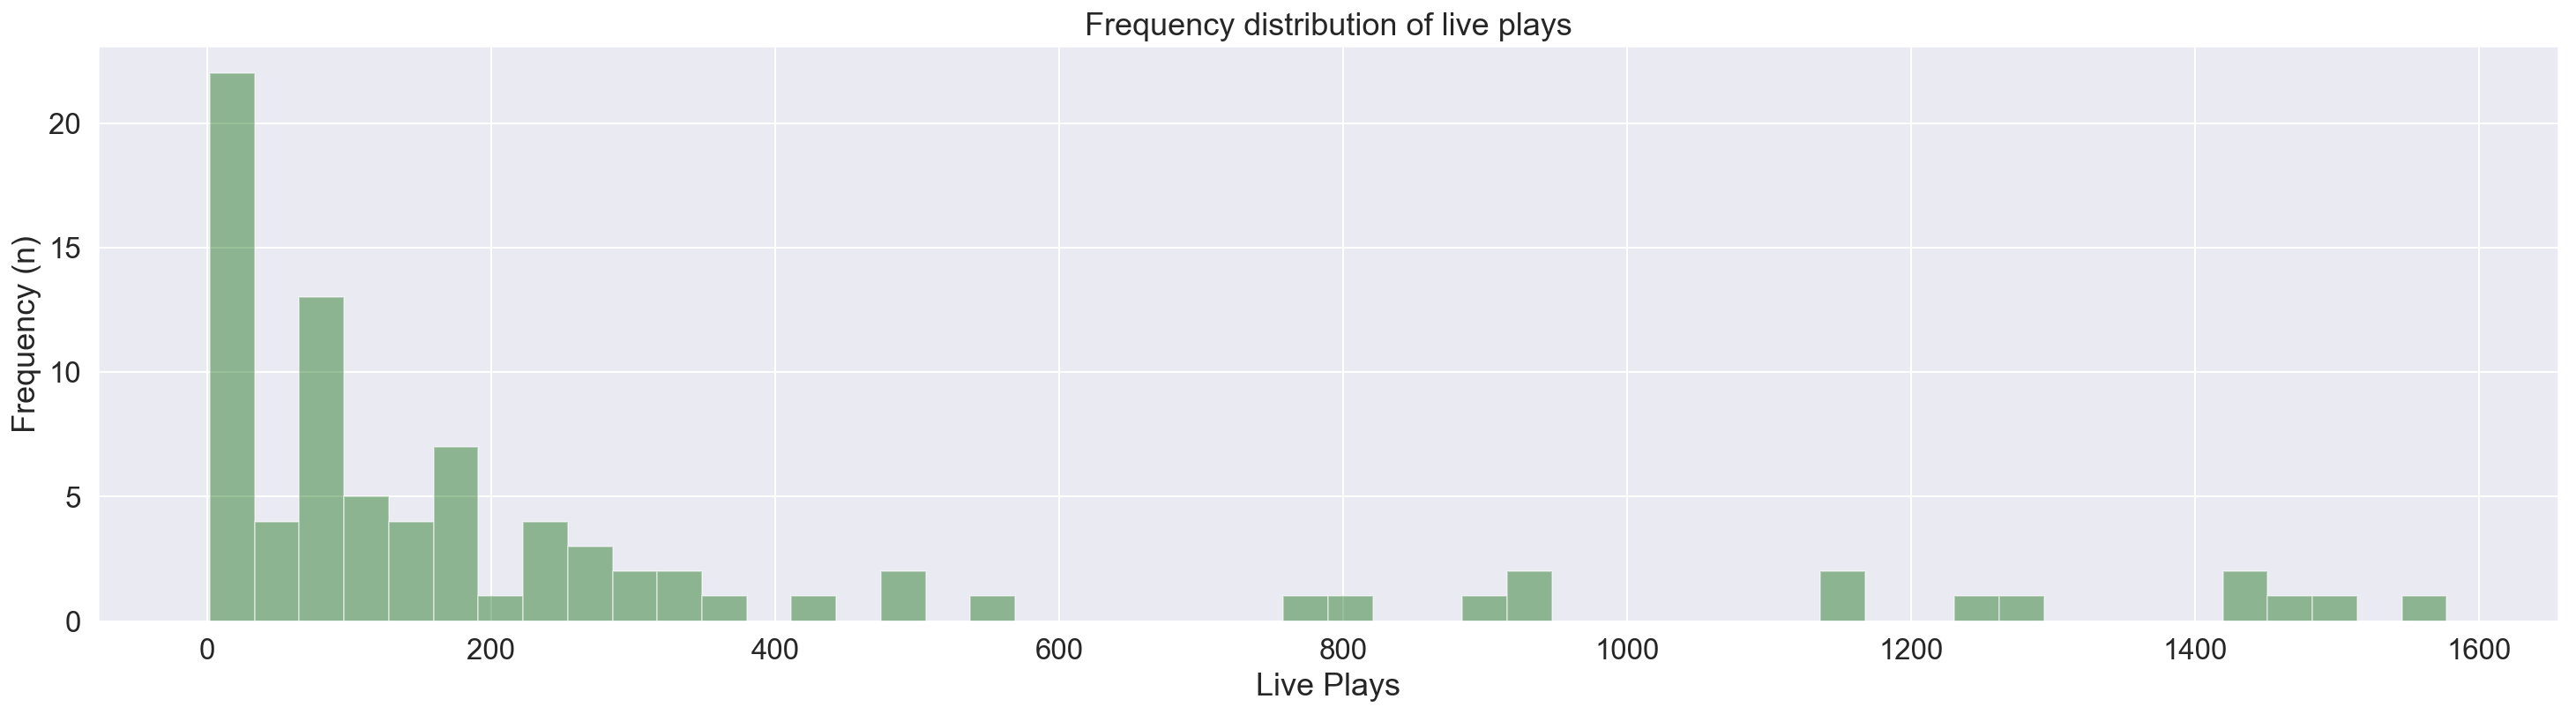

In [70]:
fig, ax = plt.subplots(figsize=(25,6))
sns.distplot(live_plays, bins=50, kde=False, 
             color='darkgreen'
            )
ax.set(xlabel='Live Plays', ylabel='Frequency (n)')
ax.set_title('Frequency distribution of live plays')
plt.show()

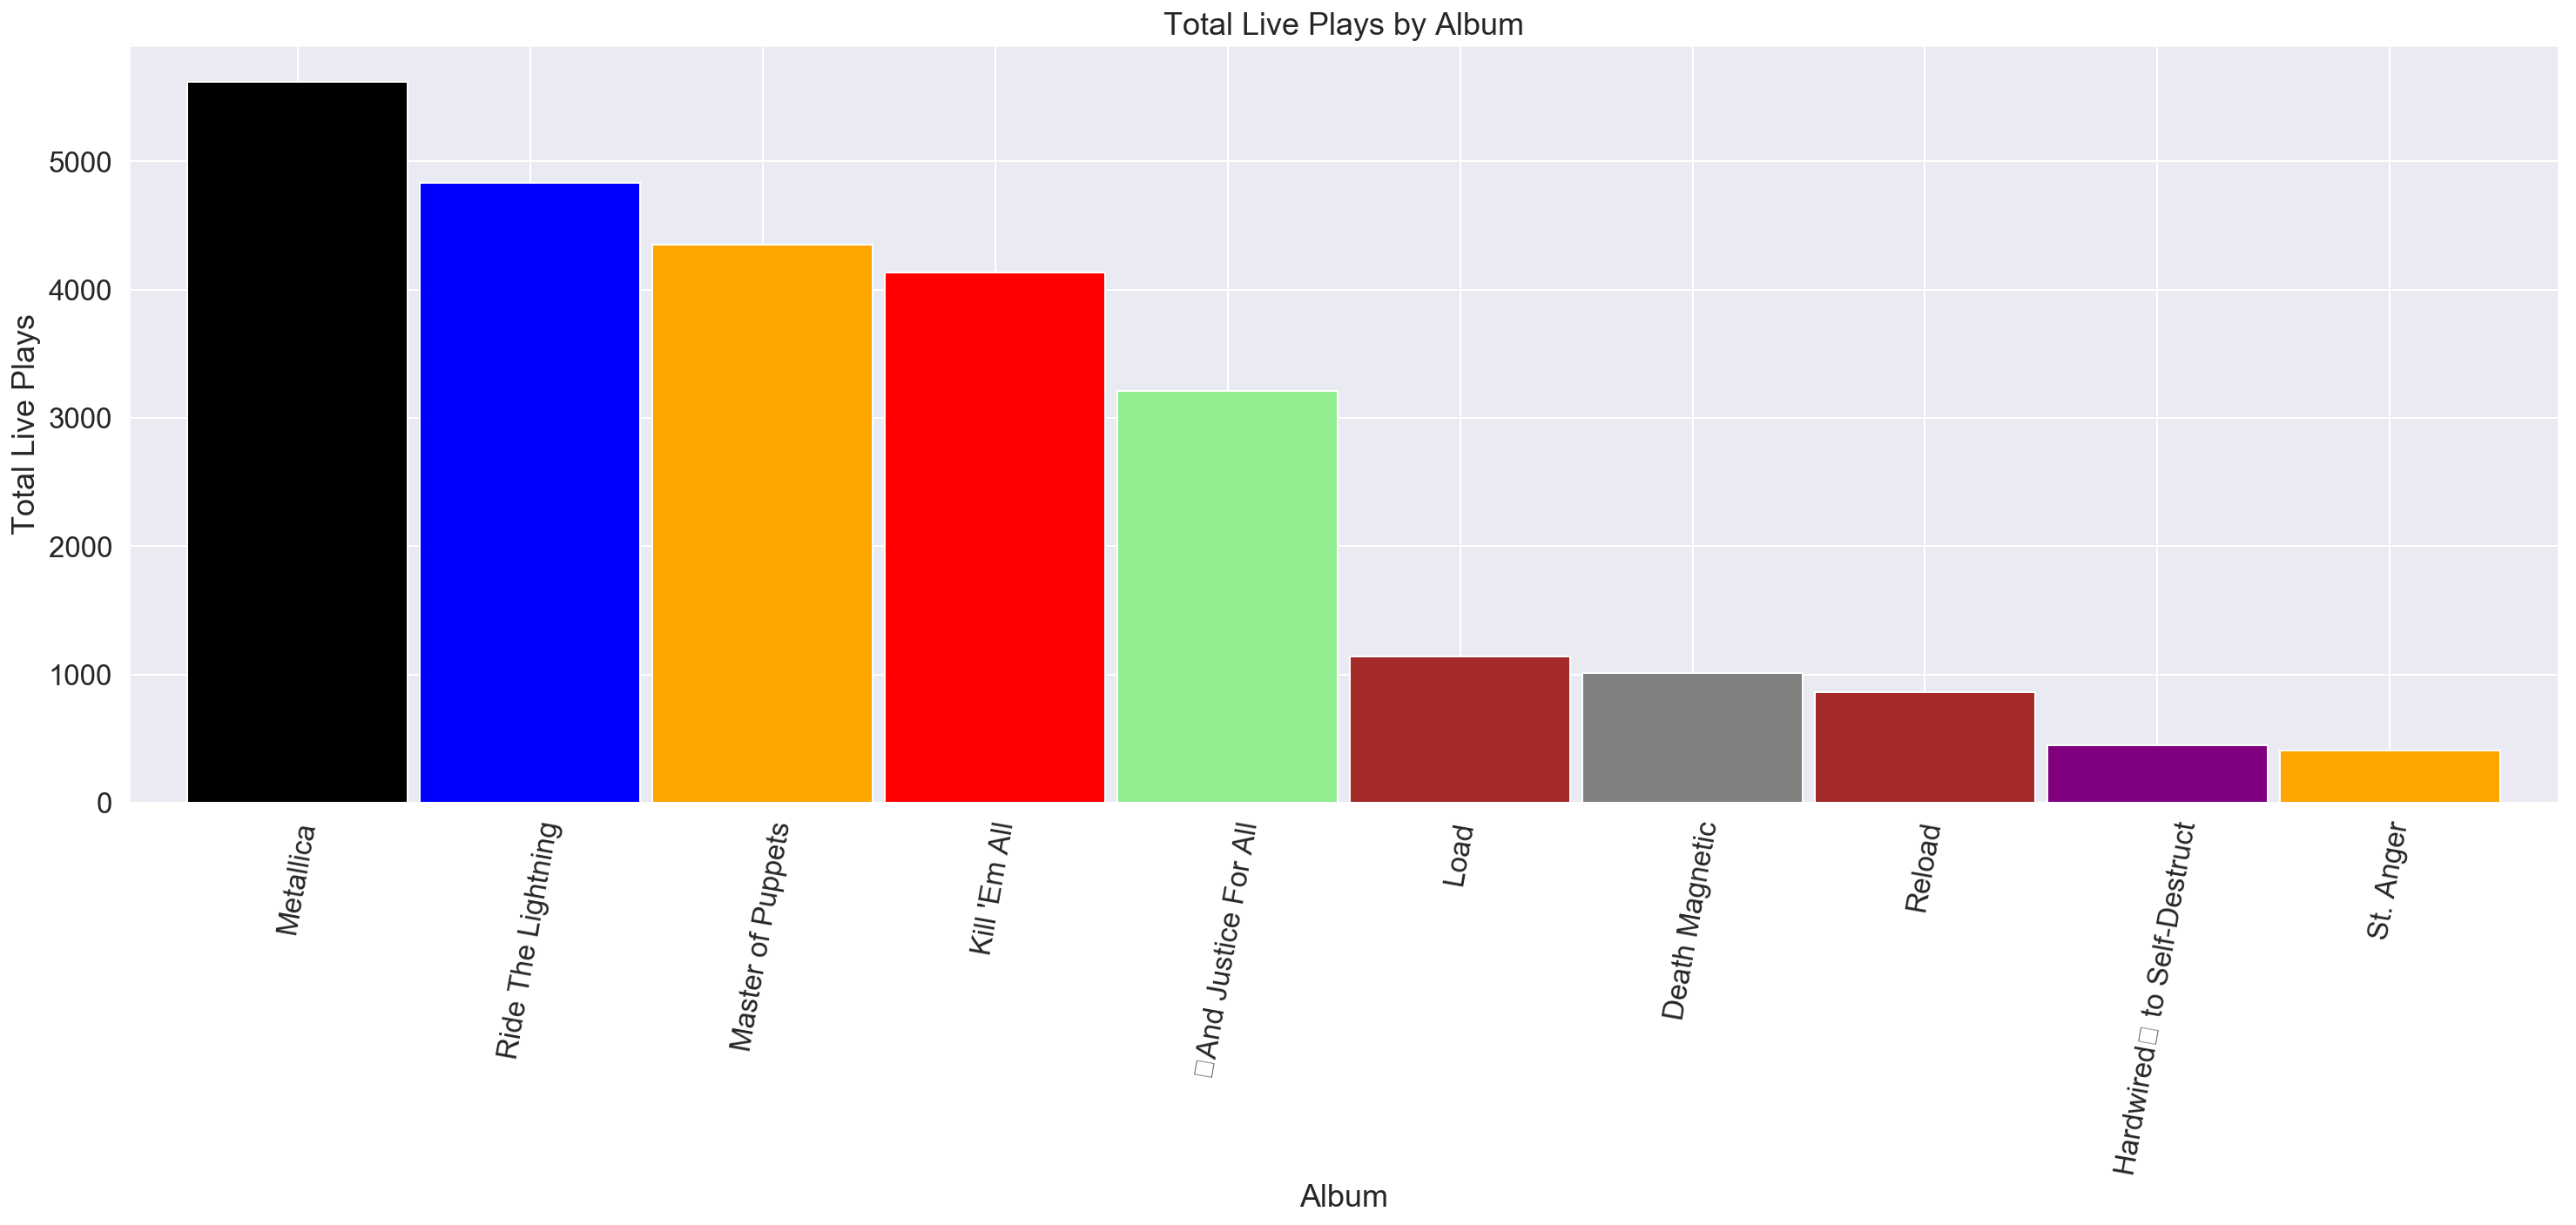

In [71]:
fig, ax = plt.subplots(figsize=(25,8))
plays_byalbum = met.groupby(['Album'])['PlayedLive'].sum()
plays_byalbum.sort_values(ascending=False).plot(kind='bar',color=['black','blue','orange','red','lightgreen','brown','grey','brown','purple','orange'],width=0.95)
ax.set_title('Total Live Plays by Album')
ax.set(xlabel="Album", ylabel="Total Live Plays")
plt.xticks(rotation=80)
plt.show()

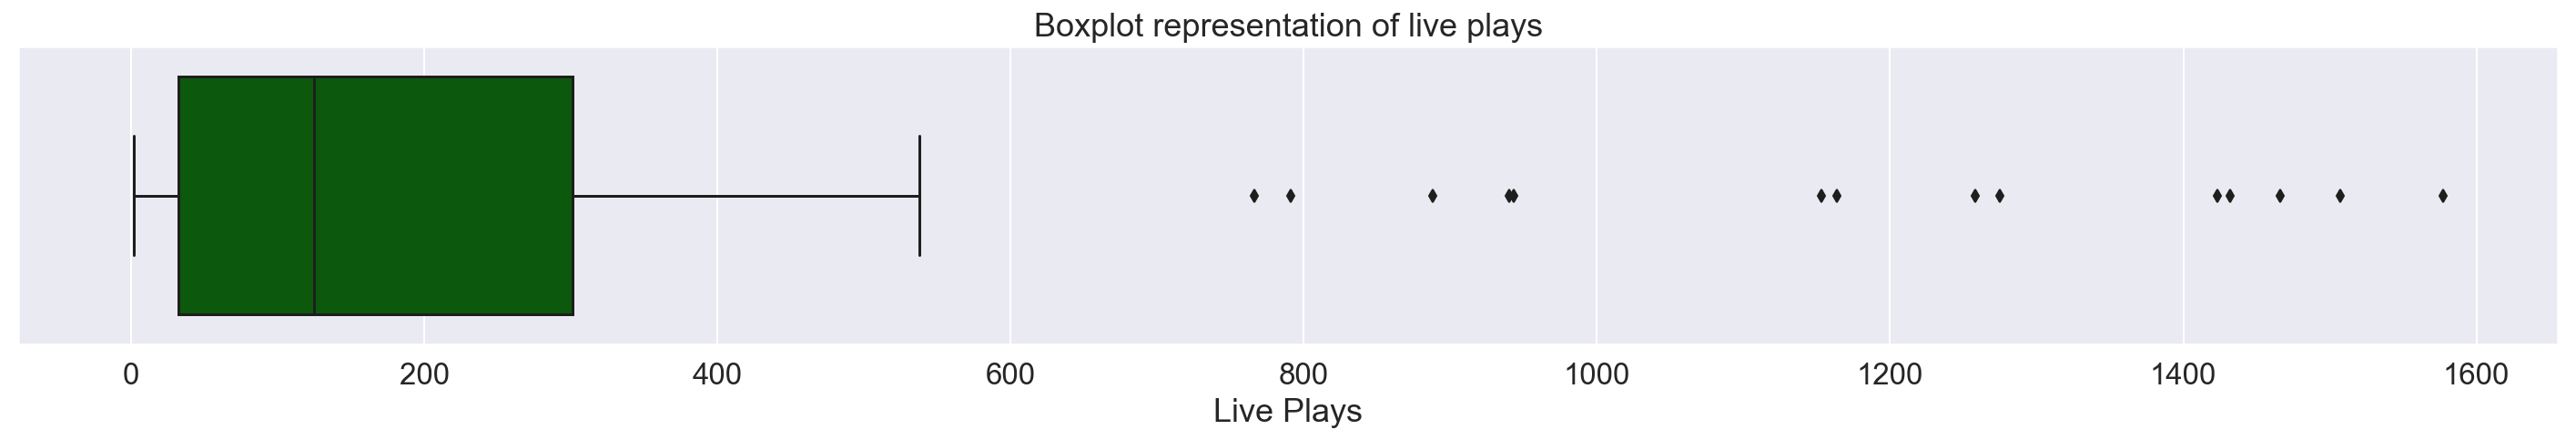

In [72]:
fig, ax = plt.subplots(figsize=(25,3))
sns.boxplot(live_plays, color='darkgreen')
ax.set(xlabel='Live Plays')
ax.set_title('Boxplot representation of live plays')
plt.show()

## Tracks from the earllier albums have gathered the most live plays overall - particulalry 'Ride the lightning' and 'Master of Puppets'

In [1]:
met.plot(kind='bar',x='Song',y='PlayedLive', width=0.99, legend=False,fontsize=12,figsize=(29,12),
       
color=['red','red','red','red','red','red','red','red','red','red','blue','blue','blue','blue','blue','blue','blue','blue',
'orange','orange','orange','orange','orange','orange','orange','orange','lightgreen','lightgreen','lightgreen','lightgreen',
'lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','black','black','black','black','black','black','black','black',
'black','black','black','black','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown',
'brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','orange',
'orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','grey','grey','grey','grey','grey',
'grey','grey','grey','grey','grey','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple'
,'purple'], )
ax.set_title('Live plays by Song')
ax.set(xlabel="Song", ylabel=" Live Plays")

plt.show()

NameError: name 'met' is not defined

## However, because of time passed the earlier tracks have a greater chance of accumulating live plays. To account for time, allocating a weighting variable will help establish genuine 'live strength' 

## for example - what is more impressive: a 20 year old song that has been played live a hundred times, or a 2 year old song that has been played a hundred times? Weighting will balance this out and then normalising the score between 0-100 will help contextualise 'live strength' better.

In [74]:
#create a weighting factor to account for time and then create new column called "Weighted_PlayedLive"

album = list(met.Album)
weights = []
for song in album:
    if song == "Kill 'Em All":
        weights.append(1)
    elif song == 'Ride The Lightning':
        weights.append(2)
    elif song == 'Master of Puppets':
        weights.append(3)
    elif song == '�And Justice For All':
        weights.append(4)
    elif song == 'Metallica':
        weights.append(5)
    elif song == 'Load':
        weights.append(6)
    elif song == 'Reload':
        weights.append(7)
    elif song == 'St. Anger':
        weights.append(8)
    elif song == 'Death Magnetic':
        weights.append(9) 
    else: 
        weights.append(10) 
        
met.loc[:,"Weights"] = weights


        
#creating the new metric     
met.loc[:,"Weighted_PlayedLive"] =  met["Weights"] * met["PlayedLive"]

#function that takes alist or series as an argument along with desired upper and lower boundaries and then normalises the data to this scale
def normalise(series,new_max,new_min):
    maximum = max(series)
    minimum = min(series)
    normalised_series = []
    for num in series:
        normalised_series.append((num-minimum) / (maximum-minimum)*(new_max-new_min))
    return normalised_series

 
#creating a new column in the data frame of 'Live Strength' - which is PlayedLive with weights applied and normalised between 1-100
met.loc[:,"Live_Strength"] = normalise(met.Weighted_PlayedLive,100,0)



## When we apply weights to the live plays we can see that there are a handful of songs that really stand out, the top three coming from 'Metallica': 'Enter Sandman', 'Sad but true' and 'Nothing else matters'

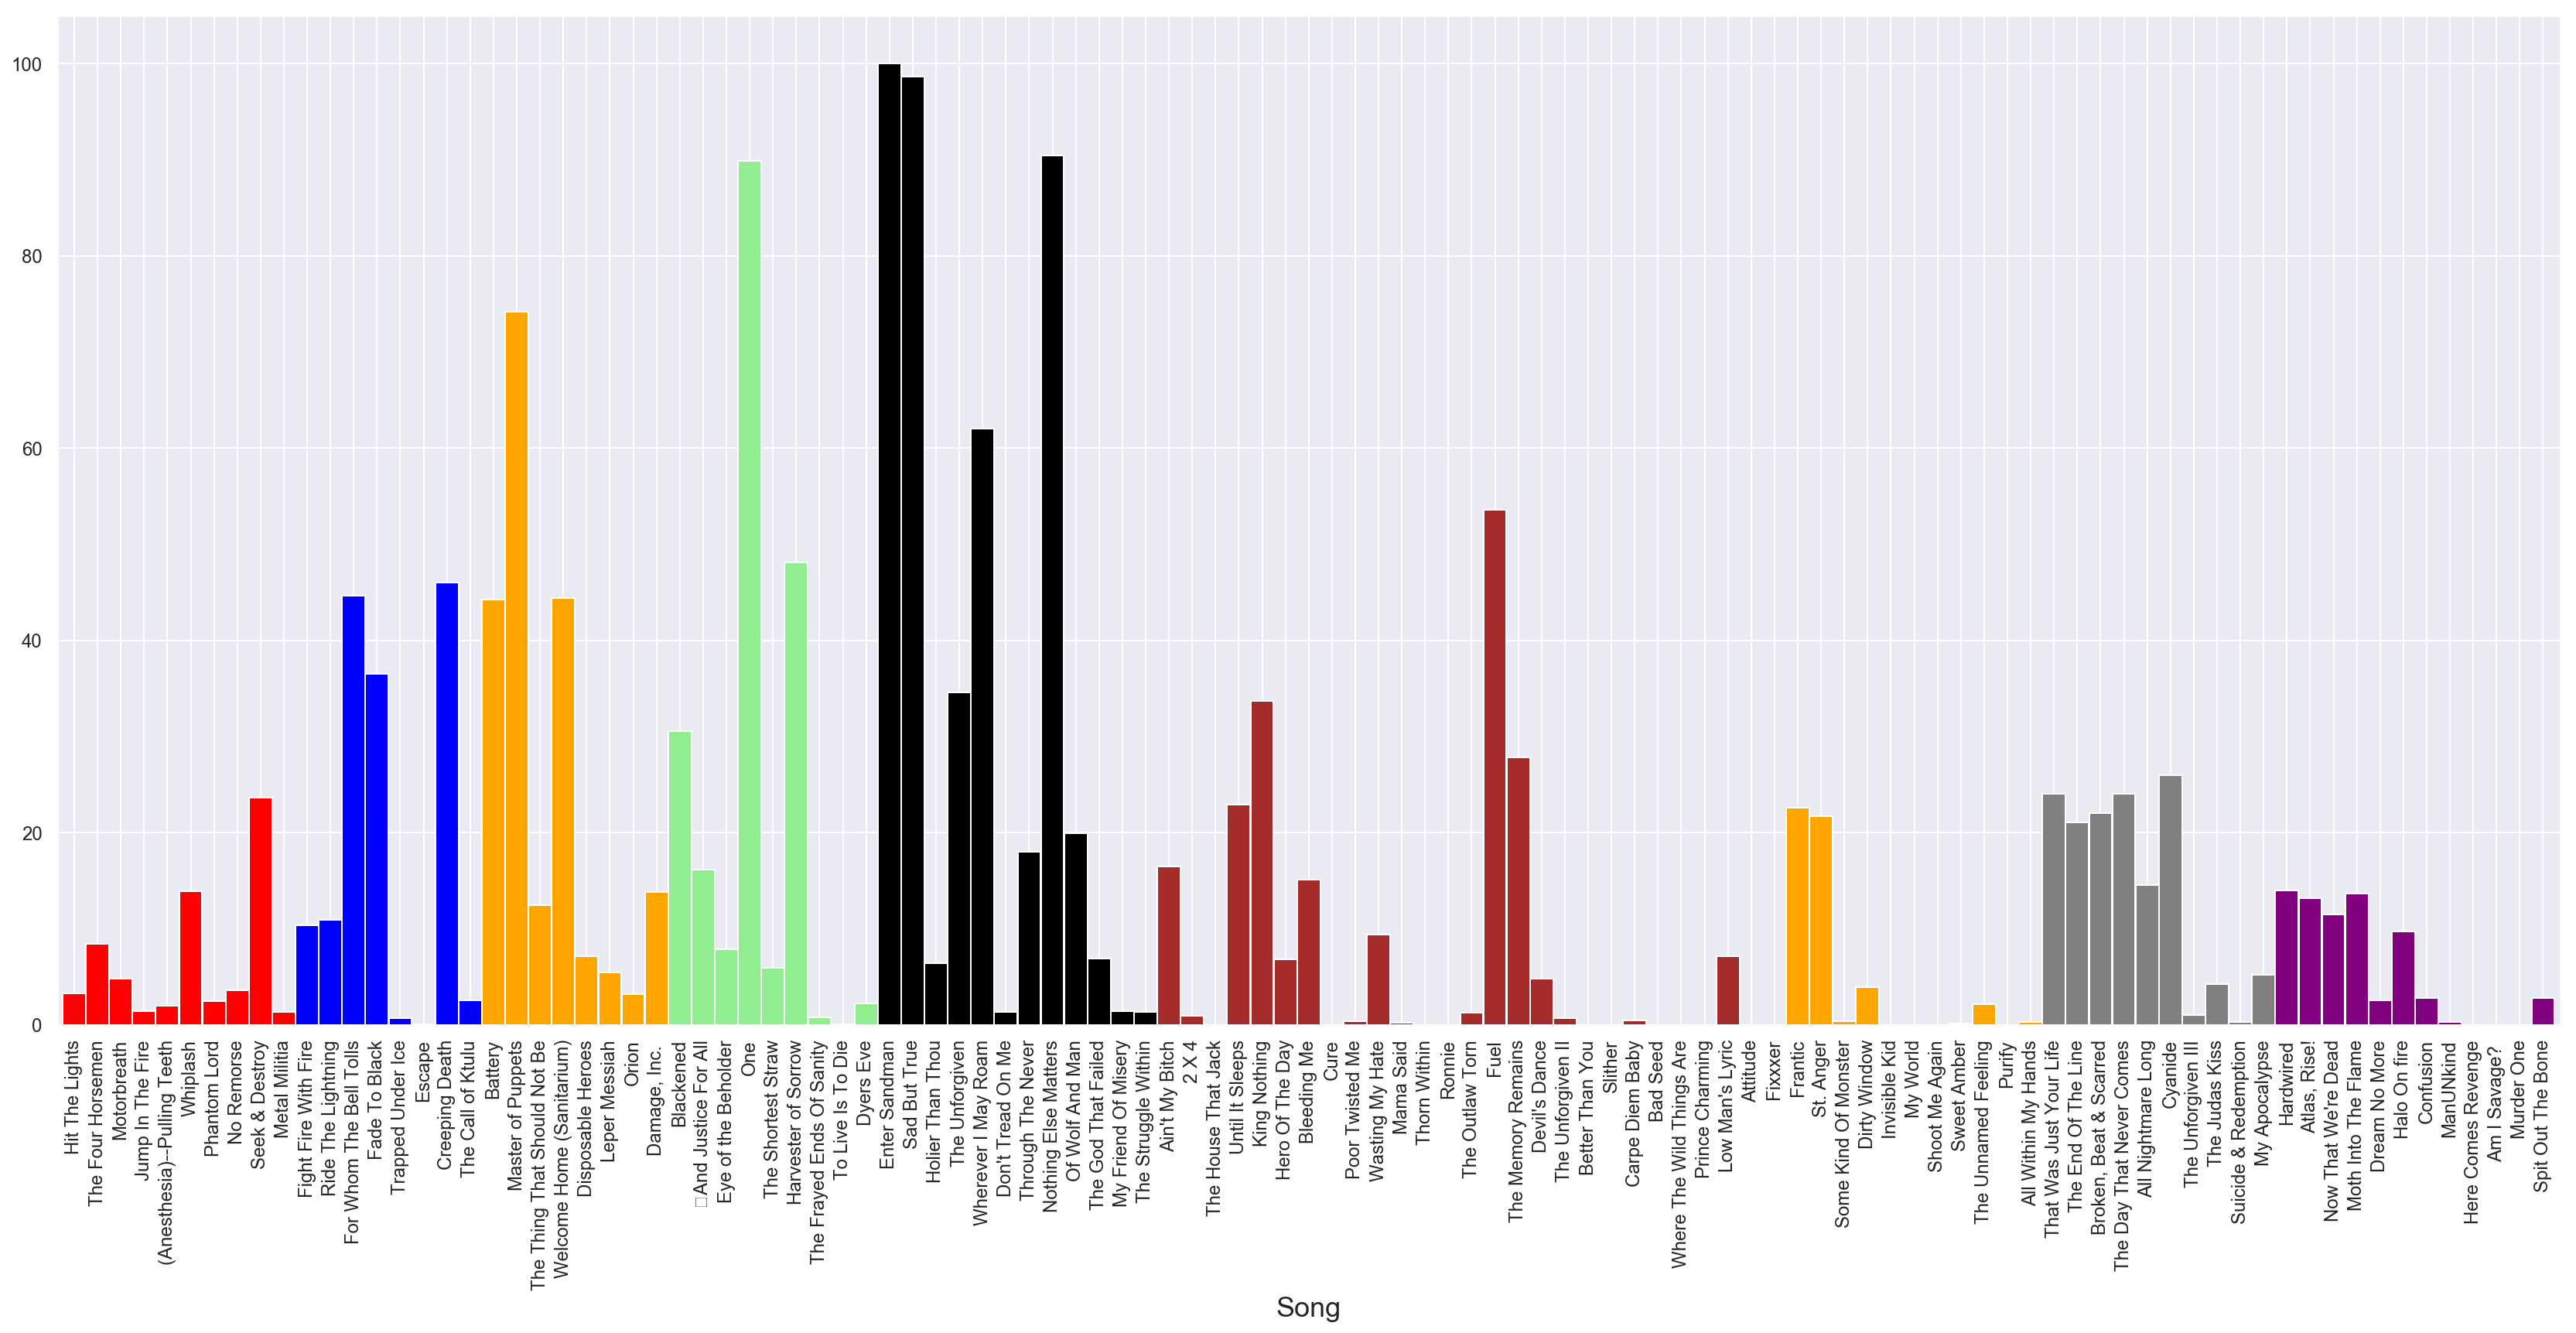

In [75]:
met.plot(kind='bar',x='Song',y='Live_Strength', width=0.99, legend=False,fontsize=12,figsize=(29,12),
       
color=['red','red','red','red','red','red','red','red','red','red','blue','blue','blue','blue','blue','blue','blue','blue',
'orange','orange','orange','orange','orange','orange','orange','orange','lightgreen','lightgreen','lightgreen','lightgreen',
'lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','black','black','black','black','black','black','black','black',
'black','black','black','black','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown',
'brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','brown','orange',
'orange','orange','orange','orange','orange','orange','orange','orange','orange','orange','grey','grey','grey','grey','grey',
'grey','grey','grey','grey','grey','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple','purple'
,'purple'], )
ax.set_title('Live plays by Song')
ax.set(xlabel="Song", ylabel=" Live Plays")

plt.show()

# Award Analysis

Sales & Awards
What albums have gone gold / platinum?

In [90]:
awards = met.pivot_table(values = ["IsGold","IsPlatinum"], index=["Album"], aggfunc=np.sum)
awards["Total"] = awards["IsGold"] + awards["IsPlatinum"] 

In [91]:
awards["Album"] = awards.index

In [92]:
awards.reset_index(drop=True,inplace=True)

In [95]:
sns.awards.sort_values(by='Total',ascending=False)

,IsGold,IsPlatinum,Total,Album
5,4,1,5,Metallica
3,2,0,2,Load
7,2,0,2,Ride The Lightning
0,1,0,1,Death Magnetic
4,1,0,1,Master of Puppets
6,1,0,1,Reload
9,1,0,1,�And Justice For All
1,0,0,0,Hardwired� to Self-Destruct
2,0,0,0,Kill 'Em All
8,0,0,0,St. Anger


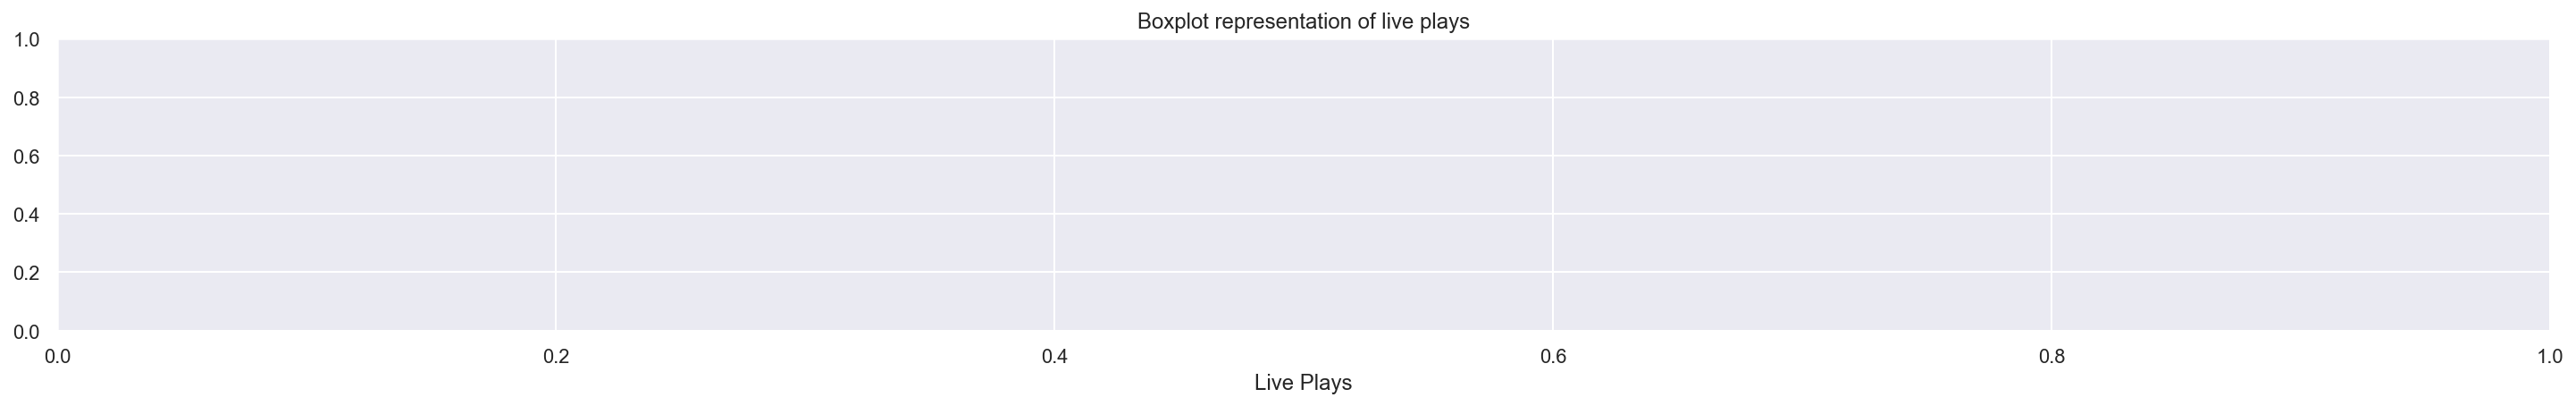

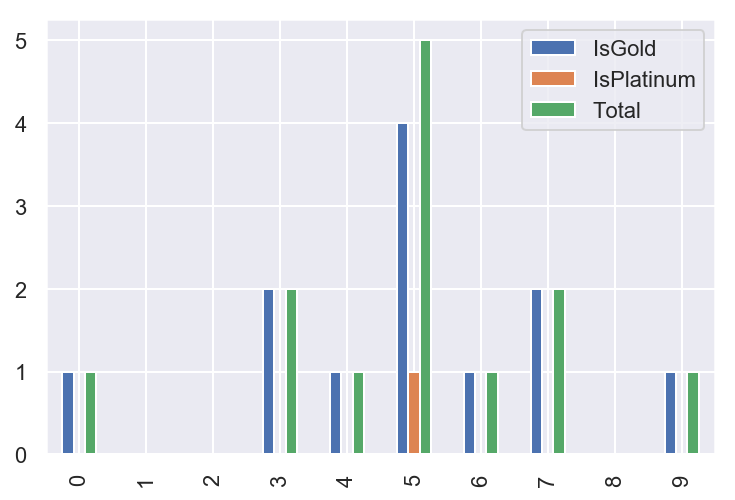

In [116]:

ax.set(xlabel='Live Plays')
ax.set_title('Boxplot representation of live plays')
plt.show()

# Lyric Analysis

In [37]:
#We have some NaN values in the lyrics because of the instrumentals, let's replace that with 'Instrumental'
met.Lyrics.fillna("Instrumental",inplace=True)

#let's add a new column which contains the total word count of each song
all_songs = list(met.Lyrics)
lyrics = [song.split(' ') for song in all_songs]
word_count = []
for song in lyrics:
    pd.Series(word_count.append(len(song)))
    
#append word count series to original dataframe  
met.loc[:,"Word_count"] = word_count


#this now means any instrumental track has a word count of one - let's replace that with zero
met.Word_count.replace(1,0, inplace=True)     

In [48]:
# NLP Using a count vectorizer.  
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
# Lets use the stop_words argument to remove words like "and, the, a"
cvec = CountVectorizer(stop_words='english')

# Fit our vectorizer using our train data
cvec.fit(met.Lyrics)

# Transform training data
cvec_mat = cvec.transform(met.Lyrics)

# words occuring
words = cvec.get_feature_names()
# number of different words
print(len(words))

2367


In [59]:
# count word appearances
def word_counter(mat):
    count = np.array(mat.sum(axis=0))[0]
    return count

In [60]:
csum = word_counter(cvec_mat)
csum

array([1, 1, 1, ..., 7, 1, 1], dtype=int64)

In [61]:
# sort words by frequency
from operator import itemgetter

def word_frequency_sorter(words,counts):
    sort_result = sorted(zip(words,list(counts)),key=itemgetter(1),reverse=True)
    return sort_result

In [62]:
df_word_frequency = pd.DataFrame(word_frequency_sorter(words,csum),columns=['word','frequency'])
df_word_frequency.set_index('word',inplace=True)
df_word_frequency.head(20)

,frequency
word,
just,103
life,103
ve,101
away,80
don,79
way,78
let,76
time,76
ll,75


In [66]:
df_word_frequency = {}
for i in range(4):
    csum_i = word_counter(cvec_mat[met.Album==i,:])

    df_word_frequency[i] = pd.DataFrame(word_frequency_sorter(words,csum_i),columns=['word','frequency'])
    df_word_frequency[i].set_index('word',inplace=True)
    print(met.Album[i])
    print(df_word_frequency[i].head(20))
    print()

           frequency
word                
hit             1070
lights          1070
start            428
gonna            321
rock             321
stop             321
want             321
fans             214
got              214
pain             214
right            214
screaming        214
sweet            214
alright          107
ass              107
away             107
blow             107
brain            107
causing          107
higher           107

           frequency
word                
hit             1070
lights          1070
start            428
gonna            321
rock             321
stop             321
want             321
fans             214
got              214
pain             214
right            214
screaming        214
sweet            214
alright          107
ass              107
away             107
blow             107
brain            107
causing          107
higher           107

           frequency
word                
hit             1070
lights     

## Exploring some relationships

In [39]:
met




,Album,Song,TrackNumber,Year,Yeahs,Minutes,Seconds,LengthInSeconds,YeahsPerSecond,IsGold,...,CliffBurton,DaveMustaine,JasonNewstead,RobertTrujillo,PlayedLive,Lyrics,Weights,Weighted_PlayedLive,Live_Strength,Word_count
0,Kill 'Em All,Hit The Lights,1,1983,3,4,15,255,0.011765,0,...,0,0,0,0,210,No life till leather\n We are gonna kick some ...,1,210,3.294118,136
1,Kill 'Em All,The Four Horsemen,2,1983,4,7,12,432,0.009259,0,...,0,1,0,0,538,By the last breath of the fourth winds blow\n ...,1,538,8.439216,271
2,Kill 'Em All,Motorbreath,3,1983,0,3,7,187,0.000000,0,...,0,0,0,0,304,Living and dying laughing and crying\n Once yo...,1,304,4.768627,194
3,Kill 'Em All,Jump In The Fire,4,1983,0,4,41,281,0.000000,0,...,0,1,0,0,91,Down in the depths of my fiery home\n The summ...,1,91,1.427451,218
4,Kill 'Em All,(Anesthesia)--Pulling Teeth,5,1983,0,4,14,254,0.000000,0,...,1,0,0,0,125,Instrumental,1,125,1.960784,0
5,Kill 'Em All,Whiplash,6,1983,0,4,8,248,0.000000,0,...,0,0,0,0,888,"Late at night, all systems go\n You�ve come to...",1,888,13.929412,226
6,Kill 'Em All,Phantom Lord,7,1983,0,5,1,301,0.000000,0,...,0,1,0,0,155,Sound is ripping through your ears\n The deafe...,1,155,2.431373,176
7,Kill 'Em All,No Remorse,8,1983,0,6,26,386,0.000000,0,...,0,0,0,0,231,No mercy for what we are doing\n No thought to...,1,231,3.623529,257
8,Kill 'Em All,Seek & Destroy,9,1983,0,6,54,414,0.000000,0,...,0,0,0,0,1507,We�re scanning the scene in the city tonight\n...,1,1507,23.639216,226
9,Kill 'Em All,Metal Militia,10,1983,0,5,11,311,0.000000,0,...,0,1,0,0,87,Thunder and lightning the gods take revenge\n ...,1,87,1.364706,192


AttributeError: 'numpy.int64' object has no attribute 'lower'

In [28]:
a = met.Lyrics[0]

In [31]:
from sklearn.feature_extraction.text import CountVectorizer



In [32]:

from collections import Counter
print(Counter(a.lower().split()))


Counter({'the': 13, 'we': 12, 'hit': 10, 'lights': 10, 'to': 6, 'are': 4, 'when': 4, 'start': 4, 'gonna': 3, 'our': 3, 'rock': 3, 'never': 3, 'want': 3, 'stop': 3, 'again': 3, 'got': 2, 'fans': 2, 'screaming': 2, 'right': 2, 'with': 2, 'sweet': 2, 'pain': 2, 'no': 1, 'life': 1, 'till': 1, 'leather': 1, 'kick': 1, 'some': 1, 'ass': 1, 'tonight': 1, 'metal': 1, 'madness': 1, "it's": 1, 'well': 1, 'alright': 1, 'know': 1, 'insane': 1, 'blow': 1, 'this': 1, 'place': 1, 'away': 1, 'volume': 1, 'higher': 1, 'than': 1, 'anything': 1, 'today': 1, 'only': 1, 'way': 1, 'all': 1, 'rip': 1, 'through': 1, 'your': 1, 'brain': 1, 'lethal': 1, 'power': 1, 'it': 1, 'is': 1, 'causing': 1, 'you': 1, 'oh': 1})


In [33]:
cvec = CountVectorizer(token_pattern='\w+')
cvec.fit([a])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='\\w+', tokenizer=None,
        vocabulary=None)

In [34]:
document_matrix = cvec.transform([a])
document_matrix

<1x60 sparse matrix of type '<class 'numpy.int64'>'
	with 60 stored elements in Compressed Sparse Row format>

In [35]:
document_matrix

<1x60 sparse matrix of type '<class 'numpy.int64'>'
	with 60 stored elements in Compressed Sparse Row format>